In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import algos.shallow_nn as shallow_nn
import algos.deep_nn as deep_nn
import algos.logistic_regression as logistic_regression

In [2]:
data = pd.read_csv("datasets/breast_cancer/data.csv")
data = data.sample(frac=1).reset_index(drop=True)

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,862548,M,14.420,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.058390,...,30.86,109.50,826.4,0.1431,0.30260,0.31940,0.15650,0.2718,0.09353,NaN
1,911320502,B,13.170,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.028700,...,23.89,95.10,687.6,0.1282,0.19650,0.18760,0.10450,0.2235,0.06925,NaN
2,875878,B,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.023770,...,22.00,90.81,600.6,0.1097,0.15060,0.17640,0.08235,0.3024,0.06949,NaN
3,858981,B,8.598,20.98,54.66,221.8,0.12430,0.08963,0.03000,0.009259,...,27.04,62.06,273.9,0.1639,0.16980,0.09001,0.02778,0.2972,0.07712,NaN
4,871149,B,10.900,12.96,68.69,366.8,0.07515,0.03718,0.00309,0.006588,...,18.20,78.07,470.0,0.1171,0.08294,0.01854,0.03953,0.2738,0.07685,NaN


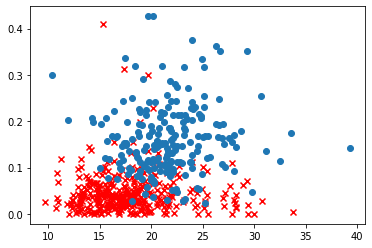

In [3]:
plt.scatter(data[data.diagnosis=="B"]["texture_mean"], data[data.diagnosis=="B"]["concavity_mean"], marker="x", color="red")
plt.scatter(data[data.diagnosis=="M"]["texture_mean"], data[data.diagnosis=="M"]["concavity_mean"], marker="o")

In [4]:
features = data.columns.values.tolist()[2:-1]

y = np.array([pd.get_dummies(data["diagnosis"])["B"]]).T
X = np.array(pd.get_dummies(data[features]))

X_train = X[:(int(len(X)*0.75)), :].T
X_val = X[(int(len(X)*0.75)):, :].T
y_train = y[:(int(len(X)*0.75)), :].T
y_val = y[(int(len(X)*0.75)):, :].T

In [5]:
X_train.shape

(30, 426)

In [20]:
lr_model = logistic_regression.model(X_train, y_train, X_val, y_val, num_iterations=10000, learning_rate=1, print_cost=True, reg_term=0.01)

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.591657
Cost after iteration 2000: 0.544684
Cost after iteration 3000: 0.509519
Cost after iteration 4000: 0.482412
Cost after iteration 5000: 0.460947
Cost after iteration 6000: 0.443561
Cost after iteration 7000: 0.429212
Cost after iteration 8000: 0.417185
Cost after iteration 9000: 0.406972
train accuracy: 85.44600938967136 %
test accuracy: 84.61538461538461 %


In [24]:
snn_model = shallow_nn.model(X_train, y_train, X_val, y_val, n_h = 20, num_iterations=10000, learning_rate=0.5, reg_term = 0.1, print_cost=True)

Cost after iteration 0: 0.722344
Cost after iteration 1000: 0.977229
Cost after iteration 2000: 2.118856
Cost after iteration 3000: 2.615337
Cost after iteration 4000: 2.870655
Cost after iteration 5000: 3.008271
Cost after iteration 6000: 3.085633
Cost after iteration 7000: 3.130592
Cost after iteration 8000: 3.157537
Cost after iteration 9000: 3.174237
Cost after iteration 9999: 3.158783
train accuracy: 85.91549295774648 %
test accuracy: 83.91608391608392 %


In [9]:
layer_dims = [30, 20, 10, 5, 1]

nn_model = deep_nn.model(X_train, y_train, X_val, y_val, layers_dims=layer_dims, activation = "relu",learning_rate = 1, print_cost = True, num_iterations=2000)

Cost after iteration 0: 0.6932031542798684
Cost after iteration 200: 0.645582555890763
Cost after iteration 400: 0.655601098426924
Cost after iteration 600: 0.655601098426924
Cost after iteration 800: 0.655601098426924
Cost after iteration 1000: 0.655601098426924
Cost after iteration 1200: 0.655601098426924
Cost after iteration 1400: 0.655601098426924
Cost after iteration 1600: 0.655601098426924
Cost after iteration 1800: 0.655601098426924
Cost after iteration 1999: 0.655601098426924
train accuracy: 63.61502347417841 %
test accuracy: 60.13986013986014 %


In [14]:
predictions = np.squeeze(shallow_nn.predict(snn_model["parameters"],  X_val))


# output = pd.DataFrame({'Sex': np.squeeze(X_val.T[:, 3]), 'Predictions': predictions, 'Actual': np.squeeze(y_val)})
output = pd.DataFrame({'Prediction': np.squeeze(y_val), 'Survived': predictions})
output.to_csv('mamo.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
